In [1]:
# Makes the display take up more of the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
# Export
import numpy as np

In [3]:
# Export
class ReplayBuffer(object):
    def __init__(self, max_size, input_shape, n_actions, algo='_', env_name='_'):
        self.memory_size = max_size
        self.name=env_name+'_'+algo
        self.memory_counter = 0
        self.state_memory = np.zeros((self.memory_size, *input_shape),
                                     dtype=np.float32)
        self.new_state_memory = np.zeros((self.memory_size, *input_shape),
                                         dtype=np.float32)

        self.action_memory = np.zeros(self.memory_size, dtype=np.int64)
        self.reward_memory = np.zeros(self.memory_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.memory_size, dtype=np.bool)

    def store_transition(self, state, action, reward, state_next, done):
        index = self.memory_counter % self.memory_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_next
        self.action_memory[index] = action
        self.reward_memory[index] = reward
        self.terminal_memory[index] = done
        self.memory_counter += 1

    def sample_buffer(self, batch_size):
        max_memory = min(self.memory_counter, self.memory_size)
        batch = np.random.choice(max_memory, batch_size, replace=False)

        states = self.state_memory[batch]
        actions = self.action_memory[batch]
        rewards = self.reward_memory[batch]
        states_next = self.new_state_memory[batch]
        terminal = self.terminal_memory[batch]

        return states, actions, rewards, states_next, terminal
    
    def save_memory_buffer(self): # this is ~5GB
        np.save(f'data/{self.name}_state', self.state_memory)
        np.save(f'data/{self.name}_next_state', self.new_state_memory)
        np.save(f'data/{self.name}_action', self.action_memory)
        np.save(f'data/{self.name}_reward', self.reward_memory)
        np.save(f'data/{self.name}_done', self.terminal_memory)
        np.save(f'data/{self.name}_memory_counter', [self.memory_counter])
        
    def load_memory_buffer(self, filename):        
        self.state_memory = np.load(f'data/{filename}_state.npy')
        self.new_state_memory = np.load(f'data/{filename}_next_state.npy')
        self.action_memory = np.load(f'data/{filename}_action.npy')
        self.reward_memory = np.load(f'data/{filename}_reward.npy')
        self.terminal_memory = np.load(f'data/{filename}_done.npy')
        self.memory_counter = np.load(f'data/{filename}_memory_counter.npy')[0]

In [4]:
sz=(224,224)
memory = ReplayBuffer(max_size=5000, input_shape=((5,)+sz), n_actions=7, algo='TestData', env_name='ReplayBuffer')

/home/stev/anaconda3/envs/airsim2NB/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [5]:
# Make Fake Data
state = np.random.random_sample((5,)+sz)
p = 0.1
for i in range(101):
    next_state = np.random.random_sample((5,)+sz)
    action = np.random.randint(0, high=7, size=1, dtype=int)[0]
    reward = np.random.normal(-30430.12, 23254.63805, 1)[0]
    done = np.random.choice(a=[False, True], size=1, p=[p, 1-p])[0]
    memory.store_transition(state, action, reward, next_state, done)
    
    state = next_state

In [6]:
memory.memory_counter, memory.name

(101, 'ReplayBuffer_TestData')

In [7]:
memory.state_memory.shape

(5000, 5, 224, 224)

In [8]:
memory.sample_buffer(32)

(array([[[[1.34130388e-01, 2.14577734e-01, 4.89215076e-01, ...,
           4.51758653e-01, 3.85130872e-03, 3.79408389e-01],
          [5.49611866e-01, 6.30225182e-01, 1.01078808e-01, ...,
           7.37560630e-01, 9.51557457e-01, 2.95832306e-02],
          [5.85677266e-01, 5.54293871e-01, 1.40979335e-01, ...,
           3.29829782e-01, 3.20680350e-01, 1.01799160e-01],
          ...,
          [9.20611382e-01, 2.60333896e-01, 3.37978005e-01, ...,
           6.35437369e-01, 6.38570845e-01, 6.42225027e-01],
          [4.33790296e-01, 7.15166271e-01, 7.10216284e-01, ...,
           3.31134349e-01, 3.41322392e-01, 8.77391756e-01],
          [4.97308910e-01, 7.07928121e-01, 5.59693635e-01, ...,
           7.52530098e-02, 6.51344061e-01, 7.33672619e-01]],
 
         [[3.13844919e-01, 1.95689768e-01, 9.54921603e-01, ...,
           8.48605573e-01, 4.27098870e-01, 2.19717816e-01],
          [8.20167422e-01, 5.85331738e-01, 5.41317701e-01, ...,
           7.71838427e-01, 6.22919381e-01, 8.24643

In [69]:
#memory.save_memory_buffer()

In [28]:
memory.load_memory_buffer('Neighborhood_900s_DDQNAgent_2022-03-20')

In [29]:
memory.memory_counter, memory.name

(273, 'ReplayBuffer_TestData')

In [30]:
memory.memory_counter

273

In [31]:
memory.state_memory.shape

(5000, 5, 224, 224)

In [37]:
states, actions, rewards, states_next, terminal=memory.sample_buffer(32)

In [38]:
i=0
state=states[i]
next_state = states_next[i]
actions[i], terminal[i]

(2, False)

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

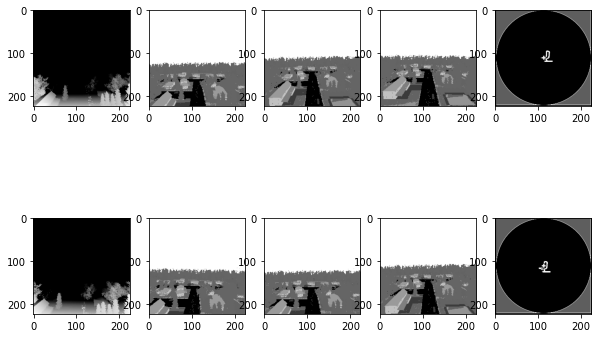

In [40]:
n_col=5
fig, ax = plt.subplots(2, n_col, figsize=(10,7))
for c in range(n_col):
    ax[0,c].imshow(state[c]*0.5+0.5, cmap='Greys')
    ax[1,c].imshow(next_state[c]*0.5+0.5, cmap='Greys')


plt.show()

In [20]:
state[0].shape

(224, 224)

In [ ]:
## don't forget to update agent to pass algo and env_name
# df_summary load then reset best score 

In [1]:
!python notebook2script.py ReplayBuffer.ipynb

Converted ReplayBuffer.ipynb to nb_files/nb_ReplayBuffer.py


In [2]:
import datetime as dt
end=dt.datetime.now()
print(f'Finished: {end.strftime("%A %B %d, %Y")} at {end.strftime("%H:%M")}')

Finished: Friday March 18, 2022 at 19:05
